In [1]:
import pandas as pd
regdf = pd.read_csv("../Downloads/MM/RegSeasonMod.csv")
regdf.head()

,Season,id,matchid,Daynum,team,Result,score,oppscore,loc,Numot,...,ftm,fta,or,dr,ast,to,stl,blk,pf,oppdr
0,2003,1,2003-1,10,1104,1,68,62,N,0,...,11,18,14,24,13,23,7,1,22,22
1,2003,2,2003-2,10,1272,1,70,63,N,0,...,10,19,15,28,16,13,4,4,18,25
2,2003,3,2003-3,11,1266,1,73,61,N,0,...,17,29,17,26,15,10,5,2,25,22
3,2003,4,2003-4,11,1296,1,56,50,N,0,...,17,31,6,19,11,12,14,2,18,20
4,2003,5,2003-5,11,1400,1,77,71,N,0,...,11,13,17,22,12,14,4,4,20,15


In [2]:
poss = pd.DataFrame(pd.pivot_table(regdf,values=('fga','or','to','fta'),index=('matchid'),aggfunc = sum)).reset_index()

In [3]:
# possesions
poss['poss'] = 0.96*(poss['fga']-poss['or']-poss['to']+(0.475*poss['fta']))

In [4]:
possessions = poss[['matchid','poss']].set_index('matchid')
possessions[:5]

,poss
matchid,
2003-1,62.400
2003-10,83.256
2003-100,71.424
2003-1000,74.400
2003-1001,69.216


In [5]:
regdf = regdf.join(possessions, on ='matchid',how='left',rsuffix = '_p')
regdf[:5]

,Season,id,matchid,Daynum,team,Result,score,oppscore,loc,Numot,...,fta,or,dr,ast,to,stl,blk,pf,oppdr,poss
0,2003,1,2003-1,10,1104,1,68,62,N,0,...,18,14,24,13,23,7,1,22,22,62.400
1,2003,2,2003-2,10,1272,1,70,63,N,0,...,19,15,28,16,13,4,4,18,25,84.024
2,2003,3,2003-3,11,1266,1,73,61,N,0,...,29,17,26,15,10,5,2,25,22,82.272
3,2003,4,2003-4,11,1296,1,56,50,N,0,...,31,6,19,11,12,14,2,18,20,52.656
4,2003,5,2003-5,11,1400,1,77,71,N,0,...,13,17,22,12,14,4,4,20,15,76.800


In [6]:
regdf.columns

Index(['Season', 'id', 'matchid', 'Daynum', 'team', 'Result', 'score',
       'oppscore', 'loc', 'Numot', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta',
       'or', 'dr', 'ast', 'to', 'stl', 'blk', 'pf', 'oppdr', 'poss'],
      dtype='object')

In [7]:
#offensive efficiency
regdf['oe'] = regdf['score']*100/regdf['poss']

#defensive efficiency
regdf['de'] = regdf['oppscore']*100/regdf['poss']

#effective field goal pct
regdf['efgp'] = (regdf['fgm']+ (0.5*regdf['fgm3'])) / regdf['fga']

#turnover pct
regdf['topct'] = regdf['to'] / regdf['poss']

#offensive rebound pct
regdf['orpct'] = regdf['or']/(regdf['or']+regdf['oppdr'])

#free throw rate
regdf['ftr'] = regdf['fta']/regdf['fga']

In [8]:
regdf[:5]

,Season,id,matchid,Daynum,team,Result,score,oppscore,loc,Numot,...,blk,pf,oppdr,poss,oe,de,efgp,topct,orpct,ftr
0,2003,1,2003-1,10,1104,1,68,62,N,0,...,1,22,22,62.400,108.974359,99.358974,0.491379,0.368590,0.388889,0.310345
1,2003,2,2003-2,10,1272,1,70,63,N,0,...,4,18,25,84.024,83.309531,74.978578,0.483871,0.154718,0.375000,0.306452
2,2003,3,2003-3,11,1266,1,73,61,N,0,...,2,25,22,82.272,88.730066,74.144302,0.482759,0.121548,0.435897,0.500000
3,2003,4,2003-4,11,1296,1,56,50,N,0,...,2,18,20,52.656,106.350653,94.955940,0.513158,0.227894,0.230769,0.815789
4,2003,5,2003-5,11,1400,1,77,71,N,0,...,4,20,15,76.800,100.260417,92.447917,0.540984,0.182292,0.531250,0.213115


In [9]:
teamseason = pd.DataFrame(pd.pivot_table(regdf,values=('oe','de','efgp','topct','orpct','ftr'),index=('Season','team'),
                            aggfunc = 'mean')).reset_index()
teamseason[:5]

,Season,team,de,efgp,ftr,oe,orpct,topct
0,2003,1102,98.007590,0.584407,0.446693,99.047952,0.168235,0.205461
1,2003,1103,95.431363,0.536564,0.465135,95.703642,0.305803,0.158523
2,2003,1104,86.493311,0.475785,0.372350,91.719199,0.371256,0.181352
3,2003,1105,102.976535,0.457983,0.359501,95.829631,0.335166,0.259103
4,2003,1106,93.377151,0.481697,0.307563,93.871689,0.349480,0.260063


In [10]:
len(teamseason)

5130

In [11]:
elo = pd.read_csv("../Downloads/MM/regseason_elo.csv")
elo.head()

,Season,Team,elo
0,1985.0,1228.0,1768.0
1,1985.0,1106.0,1430.0
2,1985.0,1112.0,1645.0
3,1985.0,1165.0,1446.0
4,1985.0,1192.0,1594.0


In [12]:
teamseason2 = pd.merge(teamseason, elo,  how='inner', left_on=['Season','team'], 
                           right_on = ['Season','Team'])
teamseason2.drop('Team',axis=1,inplace = True)

In [13]:
teamseason2 = teamseason2[teamseason2['elo']>0]
len(teamseason2)

5130

In [14]:
tourneymatches = pd.read_csv("../Downloads/MM/TourneyMatches.csv")
tourneymatches.head()

,Season,team,opp,result
0,2003,1421,1411,1
1,2003,1112,1436,1
2,2003,1113,1272,1
3,2003,1141,1166,1
4,2003,1143,1301,1


In [15]:
tourneymatches1 = pd.merge(tourneymatches, teamseason2,  how='left', left_on=['Season','team'], 
                           right_on = ['Season','team'])

In [16]:
tourneymatches_final = pd.merge(tourneymatches1, teamseason2,  how='left', left_on=['Season','opp'], 
                           right_on = ['Season','team'], suffixes = ('','_opp'))

In [17]:
tourneymatches_final['de_diff'] = tourneymatches_final['de'] - tourneymatches_final['de_opp']
tourneymatches_final['efgp_diff'] = tourneymatches_final['efgp'] - tourneymatches_final['efgp_opp']
tourneymatches_final['ftr_diff'] = tourneymatches_final['ftr'] - tourneymatches_final['ftr_opp']
tourneymatches_final['oe_diff'] = tourneymatches_final['oe'] - tourneymatches_final['oe_opp']
tourneymatches_final['orpct_diff'] = tourneymatches_final['orpct'] - tourneymatches_final['orpct_opp']
tourneymatches_final['topct_diff'] = tourneymatches_final['topct'] - tourneymatches_final['topct_opp']
tourneymatches_final['elo_diff'] = tourneymatches_final['elo'] - tourneymatches_final['elo_opp']

In [18]:
tourneymatches_final[:10]

,Season,team,opp,result,de,efgp,ftr,oe,orpct,topct,...,orpct_opp,topct_opp,elo_opp,de_diff,efgp_diff,ftr_diff,oe_diff,orpct_diff,topct_diff,elo_diff
0,2003,1421,1411,1,99.360209,0.489800,0.377214,90.152124,0.347184,0.212106,...,0.360133,0.201451,1432.0,9.451580,-0.013235,-0.152277,-2.211673,-0.012949,0.010655,-1.0
1,2003,1112,1436,1,81.193167,0.517632,0.387965,99.086295,0.394027,0.176147,...,0.380016,0.192042,1568.0,-3.434156,0.022900,0.031691,8.259472,0.014010,-0.015895,444.0
2,2003,1113,1272,1,89.810525,0.517334,0.468561,99.868873,0.398080,0.187727,...,0.366803,0.183159,1864.0,6.318605,0.018997,0.071937,4.331835,0.031277,0.004569,-121.0
3,2003,1141,1166,1,101.793851,0.572835,0.481836,110.039719,0.359177,0.258307,...,0.339233,0.184353,1847.0,15.313183,0.005381,0.127689,3.136092,0.019944,0.073955,-59.0
4,2003,1143,1301,1,87.973364,0.524098,0.348311,94.019518,0.322310,0.184171,...,0.308813,0.198346,1771.0,-4.598508,-0.010092,-0.039185,-5.708893,0.013497,-0.014175,19.0
5,2003,1163,1140,1,84.884639,0.524237,0.363274,94.494827,0.403977,0.192558,...,0.343470,0.197637,1826.0,-3.250614,-0.008439,-0.118209,-6.631662,0.060507,-0.005080,6.0
6,2003,1181,1161,1,88.638244,0.521745,0.472124,103.951321,0.375103,0.181658,...,0.361122,0.218534,1710.0,-7.131371,-0.026919,-0.003991,7.036977,0.013981,-0.036876,163.0
7,2003,1211,1153,1,88.306073,0.536146,0.460778,101.218491,0.358111,0.194174,...,0.332504,0.139801,1751.0,9.463467,0.070681,0.078662,14.323050,0.025607,0.054373,30.0
8,2003,1228,1443,1,80.356907,0.551888,0.346773,99.959448,0.307924,0.178685,...,0.357503,0.212287,1793.0,-10.354067,0.018831,-0.049208,-0.962887,-0.049579,-0.033603,95.0
9,2003,1242,1429,1,83.035010,0.525461,0.389676,102.151360,0.382850,0.189938,...,0.391238,0.179327,1649.0,-3.528722,0.030458,-0.002747,7.594105,-0.008388,0.010610,311.0


In [19]:
tourneymatches_final.columns

Index(['Season', 'team', 'opp', 'result', 'de', 'efgp', 'ftr', 'oe', 'orpct',
       'topct', 'elo', 'team_opp', 'de_opp', 'efgp_opp', 'ftr_opp', 'oe_opp',
       'orpct_opp', 'topct_opp', 'elo_opp', 'de_diff', 'efgp_diff', 'ftr_diff',
       'oe_diff', 'orpct_diff', 'topct_diff', 'elo_diff'],
      dtype='object')

In [20]:
train = tourneymatches_final[tourneymatches_final['Season']<2016]
test = tourneymatches_final[tourneymatches_final['Season']==2016]

In [21]:
len(train)

1694

In [22]:
len(test)

134

In [26]:
formula = 'result ~ 0 + de + efgp + ftr + oe + orpct + topct + elo + de_opp + efgp_opp + ftr_opp + oe_opp + orpct_opp + topct_opp + elo_opp'

In [24]:
formula = 'result ~ 0 + de_diff + efgp_diff + ftr_diff + oe_diff + orpct_diff + topct_diff + elo_diff'

In [25]:
formula = 'result ~ 0 + de + efgp + ftr + oe + orpct + topct + elo + de_diff + efgp_diff + ftr_diff + oe_diff + orpct_diff + topct_diff + elo_diff'

In [27]:
from patsy import dmatrices

Y_train, X_train = dmatrices(formula, train, return_type='dataframe')
y_train = Y_train['result'].values

Y_test, X_test = dmatrices(formula, test, return_type='dataframe')
y_test = Y_test['result'].values

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
result = model.fit(X_train, y_train)

print ('Train accuracy:')
print (metrics.accuracy_score(y_train, model.predict(X_train)))
print (metrics.log_loss(y_train, model.predict_proba(X_train)[:,1]))

print ('\nTest accuracy:')
print (metrics.accuracy_score(y_test, model.predict(X_test)))
print (metrics.log_loss(y_test, model.predict_proba(X_test)[:,1]))

Train accuracy:
0.706021251476
0.540373401909

Test accuracy:
0.731343283582
0.552501941375


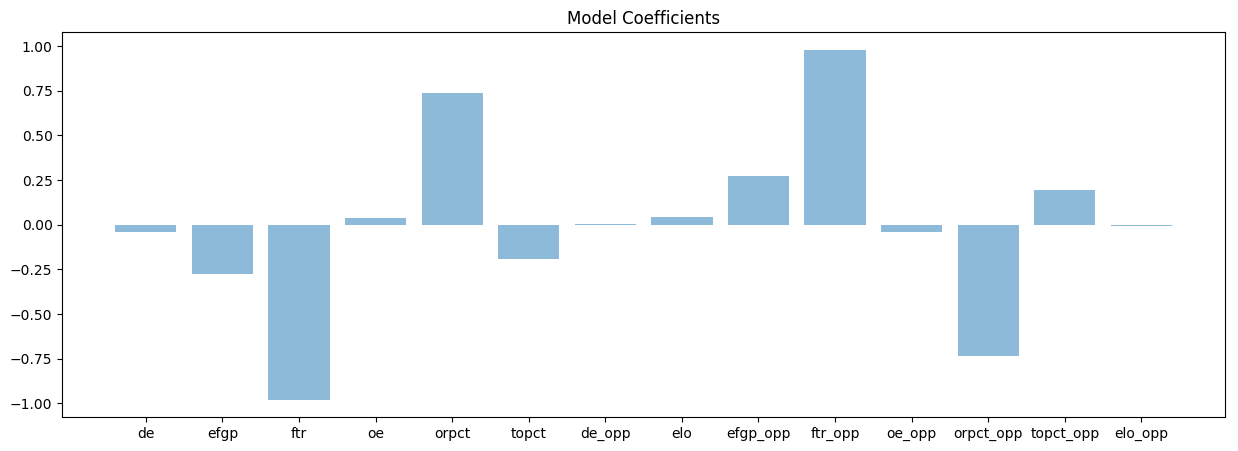

In [29]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
predictors = ('de', 'efgp', 'ftr', 'oe', 'orpct', 'topct', 'de_opp', 'elo', 'efgp_opp', 'ftr_opp', 'oe_opp', 'orpct_opp', 'topct_opp', 'elo_opp')
y_pos = np.arange(len(predictors))
model_coeff = model.coef_.tolist()[0]
 
plt.bar(y_pos, model_coeff, align='center', alpha=0.5, )
plt.xticks(y_pos, predictors)
plt.title('Model Coefficients')
 
plt.show()

In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import grid_search
%matplotlib inline

C:\Users\siddh\Anaconda2\envs\p35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\siddh\Anaconda2\envs\p35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Random Forest

In [38]:
rf_model_1 = RandomForestClassifier(n_jobs=-1, oob_score = True)

C = {'n_estimators':[100,200,300,400,500,600],'max_features': ['sqrt','log2',None]}

clf = grid_search.GridSearchCV(estimator=rf_model_1, param_grid=C, cv=3,n_jobs=-1,scoring='neg_log_loss')

#Train the model
clf.fit(X_train,y_train)

#Best value of C 
print ('Best C:',clf.best_estimator_)

Best C: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


In [40]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
model.fit(X_train,y_train)

print ('Train accuracy:')
print (metrics.accuracy_score(y_train, model.predict(X_train)))
print (metrics.log_loss(y_train, model.predict_proba(X_train)[:,1]))

print ('\nTest accuracy:')
print (metrics.accuracy_score(y_test, model.predict(X_test)))
print (metrics.log_loss(y_test, model.predict_proba(X_test)[:,1]))

Train accuracy:
1.0
0.162454436145

Test accuracy:
0.671641791045
0.569682161736


# Gradient boosting decision tree

In [36]:
gb_model_1 = GradientBoostingClassifier()

C = {'n_estimators':[100,200,300,400,500],'learning_rate': [0.001, 0.01, 0.1]}

clf = grid_search.GridSearchCV(estimator=gb_model_1, param_grid=C,n_jobs=-1,cv=3,scoring='neg_log_loss')

#Train the model
clf.fit(X_train,y_train)

#Best value of C 
print ('Best C:',clf.best_estimator_)

Best C: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=400, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [37]:
model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=400, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
model.fit(X_train,y_train)

print ('Train accuracy:')
print (metrics.accuracy_score(y_train, model.predict(X_train)))
print (metrics.log_loss(y_train, model.predict_proba(X_train)[:,1]))

print ('\nTest accuracy:')
print (metrics.accuracy_score(y_test, model.predict(X_test)))
print (metrics.log_loss(y_test, model.predict_proba(X_test)[:,1]))

Train accuracy:
0.778630460449
0.480967596331

Test accuracy:
0.708955223881
0.565129825573


# XGBoost

In [44]:
from sklearn import grid_search

xgb_model_1 = XGBClassifier()

C = {'n_estimators':[700,900,1200,1500],'learning_rate': [0.001, 0.01, 0.1]}

clf = grid_search.GridSearchCV(estimator=xgb_model_1, param_grid=C,n_jobs=-1,cv=3,scoring='neg_log_loss')

#Train the model
clf.fit(X_train,y_train)

#Best value of C 
print ('Best C:',clf.best_estimator_)

Best C: XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [45]:
model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
model.fit(X_train,y_train)

print ('Train accuracy:')
print (metrics.accuracy_score(y_train, model.predict(X_train)))
print (metrics.log_loss(y_train, model.predict_proba(X_train)[:,1]))

print ('\nTest accuracy:')
print (metrics.accuracy_score(y_test, model.predict(X_test)))
print (metrics.log_loss(y_test, model.predict_proba(X_test)[:,1]))

Train accuracy:
0.796340023613
0.44606927265

Test accuracy:
0.686567164179
0.560155466227


# SVM

In [48]:
from sklearn.svm import SVC

#Build the SVM model
C = {'C':[0.01,0.1,1,10,100]}
svm_linear = SVC(kernel = 'linear', probability = True)
clf = grid_search.GridSearchCV(estimator=svm_linear, param_grid=C, cv=3,scoring='neg_log_loss')

#Train the model
clf_train = clf.fit(X_train,y_train)

#Predict
clf_pred_train = clf.predict(X_train)
clf_pred_test = clf.predict(X_test)

#Best value of C 
print ('Best value of C:',clf.best_estimator_)

Best value of C: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [49]:
model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X_train,y_train)

print ('Train accuracy:')
print (metrics.accuracy_score(y_train, model.predict(X_train)))
print (metrics.log_loss(y_train, model.predict_proba(X_train)[:,1]))

print ('\nTest accuracy:')
print (metrics.accuracy_score(y_test, model.predict(X_test)))
print (metrics.log_loss(y_test, model.predict_proba(X_test)[:,1]))

Train accuracy:
0.703069657615
0.544116760949

Test accuracy:
0.701492537313
0.559567396238


In [51]:
from sklearn.svm import SVC

#Build the SVM model
C = {'C':[0.01,0.1,1,10,100]}
svm_linear = SVC(kernel = 'rbf', probability = True)
clf = grid_search.GridSearchCV(estimator=svm_linear, param_grid=C, cv=3,scoring='neg_log_loss')

#Train the model
clf_train = clf.fit(X_train,y_train)

#Predict
clf_pred_train = clf.predict(X_train)
clf_pred_test = clf.predict(X_test)

#Best value of C 
print ('Best value of C:',clf.best_estimator_)

Best value of C: SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [52]:
model = SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X_train,y_train)

print ('Train accuracy:')
print (metrics.accuracy_score(y_train, model.predict(X_train)))
print (metrics.log_loss(y_train, model.predict_proba(X_train)[:,1]))

print ('\nTest accuracy:')
print (metrics.accuracy_score(y_test, model.predict(X_test)))
print (metrics.log_loss(y_test, model.predict_proba(X_test)[:,1]))

Train accuracy:
1.0
0.69314718056

Test accuracy:
0.522388059701
0.69314718056
